In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
wine = pd.read_csv('wine_quality_red.csv')
wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
duplicated_wine = wine[wine.duplicated()]
duplicated_wine.shape

(240, 12)

In [6]:
wine = wine.drop_duplicates()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [7]:
wine.to_csv('wine_quality_red_preprocessed.csv')

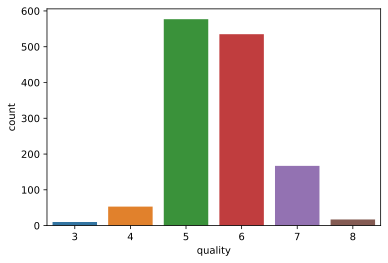

In [8]:
sns.countplot(x=wine['quality'])

Данный график показывает,что большая часть экзепляров имеет оценку 5 или 6. Значит у нас мало как очень плохих, так и очень хороших вин.

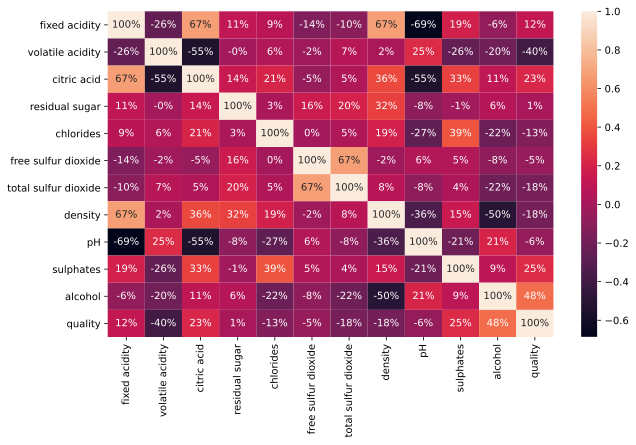

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(wine.corr(), annot=True, fmt='.0%')

Из матрицы видно,что больше всего с качеством вина связаны такие параметры как алкоголь(alcohol) и количество уксусной кислоты (volatile acidity). Меньшее влияние на качество имеют сульфаты (sulphates) и количество лимонной кислоты (citric acid).

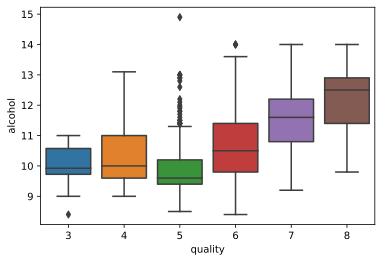

In [10]:
sns.boxplot(x='quality',y='alcohol', data=wine)

Связь между количеством алкоголя и качеством вина линейна,хотя для вин с оценкой 5 результат выбивается. Возможно, связь этих двух параметров не такая сильная.

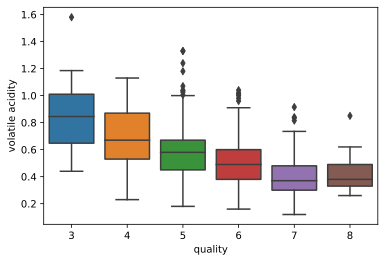

In [13]:
sns.boxplot(x='quality',y='volatile acidity', data=wine)

Из графика видно,что связь между наличием уксусной кислоты и качеством вина линейна, и чем меньше уксусной кислоты,тем выше качество вина.

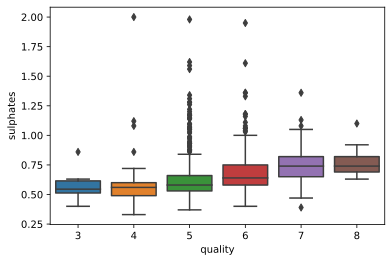

In [14]:
sns.boxplot(x='quality',y='sulphates', data=wine)

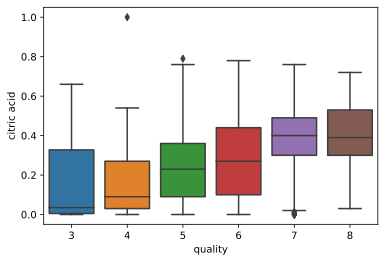

In [15]:
sns.boxplot(x='quality',y='citric acid', data=wine)

Влияние параметров "сульфаты" и "количество лимонной кислоты" на качество вина линейно. То есть при добавлении большего количество сульфатов и лимонной кислоты вино становится качественней.